<a href="https://colab.research.google.com/github/sajaldebnath/topic_sentiment_analysis/blob/main/TopicModeling_SentimentAnalysis_LDA_using_Scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **IISc - CCE AI/ML Capstone Project - Topic Modeling and Sentiment Analysis of User Reviews**

### **Abstract:**

This project is divided into two main phases. The first phase involves analyzing user reviews to identify key topics within the data. In the second phase, sentiments are assessed for each identified topic, aligning reviews with their corresponding topics and sentiment categories.

### **Approach:**

1. **Topic Modeling**

There are multiple ways to do topic modeling. For example,

* **Term Frequency-Inverse Document Frequency (TF-IDF)**: A technique in natural language processing where the TF-IDF weighting scheme is used to identify important words within a corpus of documents, allowing for the extraction of key themes and topics across the collection

* **Latent Dirichlet Allocation (LDA)**: Considered the gold standard, it uses a probabilistic framework based on Dirichlet distributions to model how topics are distributed within documents and words within topics.

* **Latent Semantic Analysis (LSA)**: A foundational technique that uses singular value decomposition (SVD) to identify latent semantic relationships between words in a corpus.

* **Non-negative Matrix Factorization (NMF)**: A matrix factorization method that ensures all components (topics and words) are non-negative, often preferred for interpretability.

* **Probabilistic Latent Semantic Analysis (pLSA)**: Similar to LSA but with a probabilistic model, offering better theoretical grounding.


**Why Use LDA?**

* **Unsupervised Approach**: You don’t need labeled data.

* **Scalable**: It works for small and large datasets alike.

* **Insightful**: Helps discover hidden themes in data without manual effort.

**When to Use LDA**

LDA is ideal for tasks like:
* Analyzing reviews to extract common feedback topics.

* Summarizing themes in a large set of articles.

* Organizing unstructured text data for further analysis.

Since I am working on user reviews dataset, I am using LDA as it is easier to implement and provides fairly accurate result.


2. **Sentiment Analysis**:

Two of the most used libraries for this purpose are **TextBlob** and **VADER**.
While both TextBlob and VADER are used for sentiment analysis, the key difference is that **VADER is specifically optimized for social media text**, meaning it handles slang, emojis, and other features common on platforms like Twitter better than **TextBlob, which is more general-purpose** and simpler to use for basic sentiment analysis.

** Key points about TextBlob and VADER**
* **Focus**:
TextBlob is a more general sentiment analysis tool, while VADER is specifically designed for social media text.

* **Strengths**:
VADER excels at interpreting social media slang and punctuation, including emojis, while TextBlob is considered easier to implement and understand for basic sentiment analysis.

* **Accuracy**:
Depending on the data, VADER might provide a more accurate sentiment analysis for social media content due to its specialized lexicon.

**When to use TextBlob**:
  * Simple sentiment analysis tasks where context is not critical
  * General text analysis where social media features are not prevalent

**When to use VADER**:

  * Analyzing sentiment on social media platforms like Twitter or Facebook
  * Cases where understanding slang, emojis, and capitalization is important


Since I will be using topic modeling using **LDA model** and then use **NLTK Vader library** to do sentiment analysis. The next step is to find out the accuracy of the model. I will be using the Coherence score to determine the accuracy. There are other methods which I will detail while going through each section.

#### **What is LDA**

* **What is Latent Dirichlet Allocation (LDA)?**

LDA is a probabilistic method used in topic modeling that helps in identifying hidden themes or topics in a collection of text documents. It assumes that each document is made up of multiple topics, and each topic is made up of certain words that frequently occur together. Also, each word in the document can be attributed to one of these topics.

Rather than manually labeling data, LDA automatically uncovers these patterns, making it useful for tasks like analyzing reviews, news articles, or any text data.

* **How Does LDA Work?**

We can consider LDA as a reverse-engineering tool for text. For example, while reading a book and trying to guess the following about the book:
  * What themes are being discussed (e.g., politics, travel, sports)?
	*	How much or what percentage of the book is focused on each of these themes?

**LDA does this mathematically by:**

* Breaking documents into small units (words).
* Determining:
  * Which “topics” are present in a document?
  * Which words are common for those topics?

**The Generative Process of LDA**

Here's how LDA imagines text is generated:
* Step 1: Pick a mix of topics for the document.
  * For example, one document might be 70% about “Food” and 30% about “Travel.”
* Step 2: For each word in the document:
  * Randomly select a topic based on the document's topic mix.
  * From the chosen topic, pick a word based on its relevance to that topic.

By observing actual documents and reversing this process, LDA figures out:

* The topic proportions for each document.
* The important words for each topic.

**Core Components of LDA**

* **Topics**: These are clusters of related words. For example:
  * Topic 1: hotel, room, breakfast, stay.
  * Topic 2: flight, airport, luggage, travel.

* **Topic Distribution**: Each document is a mix of topics. For instance:
  * A review might be 60% about “Hotels” and 40% about “Flights.”

* **Word Distribution**: Each topic has its distribution of related words, making some words more likely to appear in that topic.

**LDA in Simple Terms**

For example, let's consider sorting 1,000 reviews into several categories without knowing their content beforehand. LDA looks at the words in each review and groups them into categories (topics) based on patterns. Reviews using similar sets of words will likely belong to the same topic.

For instance:

* Reviews with words like “beach,” “view,” and “sand” might fall under the topic “Vacation.”

* Those with “bed,” “clean,” and “bathroom” could belong to “Accommodation.”

**Evaluation of LDA**

1. **Topic Coherence**: Evaluate how meaningful the topics are.
2. **Model Perplexity**: Tests how well the model predicts unseen text.


**Challenges**

1. **Overlapping Words**: Some words may belong to multiple topics, making interpretation tricky.

2. **Preprocessing Dependency**: Noisy or unclean text can affect the quality of topics.

3. **Choosing the Number of Topics**: Deciding how many topics (a key parameter) to generate is not straightforward.

**Methods of Implementation**

* Manual Implementation
* Using libraries like the following:
  * Gensim
  * Sklearn (scikit-learn)

While Gensim is the more prevalent method to be used, I chose **scikit-learn** library because it was faster to run in my environment and dataset.

#### **Process**
The main implementation steps are defined below. I will provide more details as I go through them.

1. **Data Loading and Preprocessing**: Read the data, clean it, and prepare it for topic modeling.

2. **LDA Modeling with Sklearn**: Use Latent Dirichlet Allocation to discover topics.

3. **Sentiment Analysis**: Assign sentiment polarity to the reviews for each topic.

4. **Visualization**: Create colorful graphs representing topics and sentiments.

5. **Evaluate Effectiveness**: Use coherence scores for evaluation.

6. **Hypertuning Parameters**: Suggest methods to improve the model.

### 1. Data Acquisition, Loading and Preprocessing (Cleaning)**


For this project I am usign this dataset from Kaggle https://www.kaggle.com/datasets/rhonarosecortez/new-york-airbnb-open-data/data where it has 3 files:

*   calendar.csv
*   listings.csv
*   reviewes.csv

I will be working only with reviewes.csv file as it contains customer reviews and I will be doing topic modeling only.


Apart from the above I will explore the following datasets in the future:

* [Berlin Airbnb Ratings](https://www.kaggle.com/datasets/thedevastator/berlin-airbnb-ratings-how-hosts-measure-up)

* [Google Maps Restaurant Reviews](https://www.kaggle.com/datasets/denizbilginn/google-maps-restaurant-reviews )

* [10000 Restaurant Reviews](https://www.kaggle.com/datasets/joebeachcapital/restaurant-reviews)

* [IMDB Movie Reviews with ratings](https://www.kaggle.com/datasets/nisargchodavadiya/imdb-movie-reviews-with-ratings-50k/data) (This one has the ratings and the sentiments as well. So, I can check the generated value against the actual value).


In [66]:
# @title A. Importing all necessary libraries

# Install python packages in the local environment. This is applicable only for local runtime.
!pip3 install pyLDAvis --break-system-packages
#!pip3 install optuna --break-system-packages
#!pip3 install pandas --break-system-packages
#!pip install pandas --break-system-packages
#!pip3 install scikit-learn --break-system-packages
#!pip3 install nltk --break-system-packages
#!pip3 install wordcloud --break-system-packages
#!pip3 install matplotlib --break-system-packages
#!pip3 install seaborn --break-system-packages
# We can utilize the following code to remove and deprecation warning message. I am not using them to see which portion generates the errors
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

import pandas
import pandas as pd
import numpy as np
import re

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.metrics.pairwise import cosine_similarity

import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

#from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
#from tqdm import tqdm

from wordcloud import WordCloud

import pyLDAvis
import pyLDAvis.lda_model

import matplotlib.pyplot as plt
import seaborn as sns

#import optuna

# Load VADER
nltk.download('punkt_tab')
nltk.download('vader_lexicon')
# Download the stopwords list
nltk.download('stopwords')
nltk.download('wordnet')

import string

# For advanced sentiment analysis. Hugging Face Transformers library in Python
from transformers import pipeline




[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### **B. Data Loading and Preprocessing**

While a lot of processing is handled by default by the scikit-learn library, I will keep the steps here for my understanding and custom processing. I will point them out as and when we go through them.

In [67]:
# @title Data Loading, Viewing and Various Preprocessing of Texts

# Load Data from reposiroty

url = "https://raw.githubusercontent.com/sajaldebnath/topic_sentiment_analysis/refs/heads/main/data/NY-Airbnb-Open-Data-Reviews.csv"
df = pd.read_csv(url)

# view the first 5 rows of the dataframe
df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2992450,15066586,2014-07-01,16827297,Kristen,"Large apartment; nice kitchen and bathroom. Kenneth left drinks for us which was so nice. His cousin lives upstairs, and she was very nice and helpful, too. The internet only worked about half the time, and everything on the street can be heard from the main bedroom. Wonderful stay- it was exactly what we needed. It is not in the best area of town, but I never felt unsafe."
1,2992450,21810844,2014-10-24,22648856,Christopher,"This may be a little late, but just to say Kenneth was quick to respond to our request. He left some supplies in the refrigerator and kindly showed us round downtown Albany. We were without a car and he arranged for his cousin Kristina to take us to supermarket.\r<br/>The apartment is large, clean with many original features. It is situated in an historical area that is fairly central, although like the rest of Albany you have to climb a steep hill to get to it if you are on foot. \r<br/>"
2,2992450,27434334,2015-03-04,45406,Altay,"The apartment was very clean and convenient to downtown. One thing to keep in mind: one bedroom is huge and the other is tiny, so if you're traveling with a friend you might have to flip a coin. :)"
3,2992450,28524578,2015-03-25,5485362,John,"Kenneth was ready when I got there and arranged for the upstairs neighbor to meet me at the door with the keys. Shortly after that I was left on my own in the privacy of this large 2 BR apartment - just like I like it. I really like my privacy and there was no time at which anyone came to visit me or bother me unannounced. At one point Kenneth had to pic up a refrigerator stored in the apartment, but the neighbor lady gave me plenty of notice and I was on my way out before he got there. When I returned the extra refrigerator was gone and I had the nice quiet apartment to myself. At one point I went to take a shower and found some body wash in a drawer. That was nice since all I brought with me was shampoo. The apartment is a city street apartment meaning that like many two family homes the BR window is feet away from the public sidewalk and you can hear people all hours of the night walking by and conversing, but its not terribly disruptive. Overall the apartment was just what I needed and I had an enjoyable time while there. The heat worked perfectly and the apartment was picked up. The bed was a king size and very comfortable with sensible pillows and coverings. The water pressure on the shower was awesome."
4,2992450,35913434,2015-06-23,15772025,Jennifer,"We were pleased to see how 2nd Street and the Ten Broeck neighborhood in Albany have come along. Its great to see all of the gorgeous brownstones, including the one we stayed in, being renovated and cared for.<br/>In terms of quality, I was pleased by the courtesy of the host's friend who lived nearby. He was there to let us in and make sure I knew to call with any problems. With a full kitchen and two bedrooms, my daughter and I felt at home with plenty of space. As a native of Albany I'm used to thin windows and occasionally noisy neighbors. If you don't sleep well, don't take the master bedroom and be aware that loud music may be playing during the evening and weekend. But there is a fan/ac unit to drown out the din from the street.<br/>This space has been renovated and a vast improvement I'm sure from where it was, and I'm hoping progress will continue here as it seemed a few projects were incomplete. I would have loved to enjoy more sunlight in the house but there was a ton of tree debris in the back yard so there was no way to enjoy opening the windows.<br/>On my own, this place was fine, but if traveling with my child again I will probably pick a quieter location where I'd be able to open windows or put her down for a nap without worrying about excessive noise."


In [68]:
# @title Removing unnecessary data since we will only be working with reviews column
#Removing the unnecessary columns since we will only be working with reviews
# later on we want to co-relate reviews with listings and perhaps with the reviewers
data = df[['listing_id','comments']]

data.head()

,listing_id,comments
0,2992450,"Large apartment; nice kitchen and bathroom. Kenneth left drinks for us which was so nice. His cousin lives upstairs, and she was very nice and helpful, too. The internet only worked about half the time, and everything on the street can be heard from the main bedroom. Wonderful stay- it was exactly what we needed. It is not in the best area of town, but I never felt unsafe."
1,2992450,"This may be a little late, but just to say Kenneth was quick to respond to our request. He left some supplies in the refrigerator and kindly showed us round downtown Albany. We were without a car and he arranged for his cousin Kristina to take us to supermarket.\r<br/>The apartment is large, clean with many original features. It is situated in an historical area that is fairly central, although like the rest of Albany you have to climb a steep hill to get to it if you are on foot. \r<br/>"
2,2992450,"The apartment was very clean and convenient to downtown. One thing to keep in mind: one bedroom is huge and the other is tiny, so if you're traveling with a friend you might have to flip a coin. :)"
3,2992450,"Kenneth was ready when I got there and arranged for the upstairs neighbor to meet me at the door with the keys. Shortly after that I was left on my own in the privacy of this large 2 BR apartment - just like I like it. I really like my privacy and there was no time at which anyone came to visit me or bother me unannounced. At one point Kenneth had to pic up a refrigerator stored in the apartment, but the neighbor lady gave me plenty of notice and I was on my way out before he got there. When I returned the extra refrigerator was gone and I had the nice quiet apartment to myself. At one point I went to take a shower and found some body wash in a drawer. That was nice since all I brought with me was shampoo. The apartment is a city street apartment meaning that like many two family homes the BR window is feet away from the public sidewalk and you can hear people all hours of the night walking by and conversing, but its not terribly disruptive. Overall the apartment was just what I needed and I had an enjoyable time while there. The heat worked perfectly and the apartment was picked up. The bed was a king size and very comfortable with sensible pillows and coverings. The water pressure on the shower was awesome."
4,2992450,"We were pleased to see how 2nd Street and the Ten Broeck neighborhood in Albany have come along. Its great to see all of the gorgeous brownstones, including the one we stayed in, being renovated and cared for.<br/>In terms of quality, I was pleased by the courtesy of the host's friend who lived nearby. He was there to let us in and make sure I knew to call with any problems. With a full kitchen and two bedrooms, my daughter and I felt at home with plenty of space. As a native of Albany I'm used to thin windows and occasionally noisy neighbors. If you don't sleep well, don't take the master bedroom and be aware that loud music may be playing during the evening and weekend. But there is a fan/ac unit to drown out the din from the street.<br/>This space has been renovated and a vast improvement I'm sure from where it was, and I'm hoping progress will continue here as it seemed a few projects were incomplete. I would have loved to enjoy more sunlight in the house but there was a ton of tree debris in the back yard so there was no way to enjoy opening the windows.<br/>On my own, this place was fine, but if traveling with my child again I will probably pick a quieter location where I'd be able to open windows or put her down for a nap without worrying about excessive noise."


In [69]:
# Next let's find out the details of the dataset
data.info() #provides a summary of the data frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24752 entries, 0 to 24751
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   listing_id  24752 non-null  int64 
 1   comments    24745 non-null  object
dtypes: int64(1), object(1)
memory usage: 386.9+ KB


In [70]:
# Next, let's check if there are any missing values
data.isna().sum()

,0
listing_id,0
comments,7


In [71]:
# Check for and drop any missing values
if (data['comments'].isnull().sum() > 0).any():
    print("Missing values found in the dataset.")
    # The best approach is to just drop them.
    data = data.dropna(subset=['comments'])
else:
    print("No missing values found in the dataset.")

data.info()

Missing values found in the dataset.
<class 'pandas.core.frame.DataFrame'>
Index: 24745 entries, 0 to 24751
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   listing_id  24745 non-null  int64 
 1   comments    24745 non-null  object
dtypes: int64(1), object(1)
memory usage: 580.0+ KB


In [72]:
# Number of unique listings. The rest of reviews of the same listings
data['listing_id'].nunique()

366

### In this section we will handle the pre-processing of the date which includes the following:

With the scikit-learn library a lot of preprocessing already done. I will still perform the preprocessing for custom preprocessing.

* **Replacing URLs**: Links starting with "http" or "https" or "www" are replaced by "URL".

* **Replacing Emojis**: Replace emojis by using a pre-defined dictionary containing emojis along with their meaning. (eg: ":)" to "EMOJIsmile")

* **Removing Non-Alphabets**: Replacing characters except Digits and Alphabets with a space.

* **Removing Consecutive letters**: 3 or more consecutive letters are replaced by 2 letters. (eg: "Heyyyy" to "Heyy")

* **Removing Short Words**: Words with length less than 2 are removed.

* **Removing Stopwords**: Stopwords are the English words which does not add much meaning to a sentence. They can safely be ignored without sacrificing the meaning of the sentence. (eg: "the", "he", "have")

* **Lemmatizing**: Lemmatization is the process of converting a word to its base form. (e.g: “Great” to “Good”)

* **Lower Casing**: Each text is converted to lowercase.


In [73]:
# @title Clean the text

# Defining dictionary containing all emojis with their meanings.
emojis = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad',
          ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed',
          ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
          '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
          '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink',
          ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}

In [74]:
# @title Pre-process Reviews (remove url, emojis, text patterns etc.)
def preprocess_texts(comments):

    # Defining regex patterns.
    urlPattern        = r'http[s]?://\S+' # Removes any website link starting with http or https
    alphaPattern      = r"[^a-zA-Z\s]"    # Remove special characters and numbers
    sequencePattern   = r"(.)\1\1+"       # Finds out 3 or more repeating letters likes "aaa"
    seqReplacePattern = r"\1\1"           # Replace the repeating letter sequence with two letters
    symbolPattern = r'Ã[^\x80-\xBF]+'     # Finds out the special characters like Ã
    spacePattern = r'\s+'                 # Finds out extra spaces betweem words
    brtags = r"<br ?/?>"                  # Finds out all the <br/>, <br>, </br> tags
    daysPattern = r'\d+(st|nd|rd|th)'     # \d+: Matches one or more digits. (st|nd|rd|th): Matches the suffixes "st", "nd", "rd", or "th".

    # Replace all URls with ' '
    comments = re.sub(urlPattern, '', comments, flags=re.MULTILINE)
    # Replace <br/>, <br>, </br> with " "
    comments = re.sub(brtags, ' ', comments)
    # Replace all non alphabets.
    comments = re.sub(alphaPattern, " ", comments)
    # Replace 3 or more consecutive letters by 2 letters.
    comments = re.sub(sequencePattern, seqReplacePattern, comments)
    # Replace special encoded symbols that appear as characters like Ã, Å, Ë
    comments = re.sub(symbolPattern, ' ', comments)
    # Replace days patterns like 2nd, 3rd, 4th etc.
    comments = re.sub(daysPattern, ' ', comments)

    # Replace all emojis.
    for emoji in emojis.keys():
      comments = comments.replace(emoji, " " + emojis[emoji])

    # Replace multiple spaces with a single space
    comments = re.sub(spacePattern, ' ', comments)
    # Remove all leading or trailing spaces
    comments = comments.strip()

    return comments.lower()  # Convert all words to lowercase

In [75]:
# Pre-process text reviews for AirBnB Data
import time
t = time.time()
data['processed_comments'] = data['comments'].apply(preprocess_texts) #applying the preprocess_comments function to comments column

print(f'Text Preprocessing complete.')
print(f'Time Taken: {round(time.time()-t)} seconds')

Text Preprocessing complete.
Time Taken: 1 seconds


In [76]:
#VIEW THE CLEANED Comments IN "comments" column again
pd.set_option('display.max_colwidth', None) #To view text column completely and so that pandas doesn't truncate the text

data.head() # Printing the data to see the updated result

,listing_id,comments,processed_comments
0,2992450,"Large apartment; nice kitchen and bathroom. Kenneth left drinks for us which was so nice. His cousin lives upstairs, and she was very nice and helpful, too. The internet only worked about half the time, and everything on the street can be heard from the main bedroom. Wonderful stay- it was exactly what we needed. It is not in the best area of town, but I never felt unsafe.",large apartment nice kitchen and bathroom kenneth left drinks for us which was so nice his cousin lives upstairs and she was very nice and helpful too the internet only worked about half the time and everything on the street can be heard from the main bedroom wonderful stay it was exactly what we needed it is not in the best area of town but i never felt unsafe
1,2992450,"This may be a little late, but just to say Kenneth was quick to respond to our request. He left some supplies in the refrigerator and kindly showed us round downtown Albany. We were without a car and he arranged for his cousin Kristina to take us to supermarket.\r<br/>The apartment is large, clean with many original features. It is situated in an historical area that is fairly central, although like the rest of Albany you have to climb a steep hill to get to it if you are on foot. \r<br/>",this may be a little late but just to say kenneth was quick to respond to our request he left some supplies in the refrigerator and kindly showed us round downtown albany we were without a car and he arranged for his cousin kristina to take us to supermarket the apartment is large clean with many original features it is situated in an historical area that is fairly central although like the rest of albany you have to climb a steep hill to get to it if you are on foot
2,2992450,"The apartment was very clean and convenient to downtown. One thing to keep in mind: one bedroom is huge and the other is tiny, so if you're traveling with a friend you might have to flip a coin. :)",the apartment was very clean and convenient to downtown one thing to keep in mind one bedroom is huge and the other is tiny so if you re traveling with a friend you might have to flip a coin
3,2992450,"Kenneth was ready when I got there and arranged for the upstairs neighbor to meet me at the door with the keys. Shortly after that I was left on my own in the privacy of this large 2 BR apartment - just like I like it. I really like my privacy and there was no time at which anyone came to visit me or bother me unannounced. At one point Kenneth had to pic up a refrigerator stored in the apartment, but the neighbor lady gave me plenty of notice and I was on my way out before he got there. When I returned the extra refrigerator was gone and I had the nice quiet apartment to myself. At one point I went to take a shower and found some body wash in a drawer. That was nice since all I brought with me was shampoo. The apartment is a city street apartment meaning that like many two family homes the BR window is feet away from the public sidewalk and you can hear people all hours of the night walking by and conversing, but its not terribly disruptive. Overall the apartment was just what I needed and I had an enjoyable time while there. The heat worked perfectly and the apartment was picked up. The bed was a king size and very comfortable with sensible pillows and coverings. The water pressure on the shower was awesome.",kenneth was ready when i got there and arranged for the upstairs neighbor to meet me at the door with the keys shortly after that i was left on my own in the privacy of this large br apartment just like i like it i really like my privacy and there was no time at which anyone came to visit me or bother me unannounced at one point kenneth had to pic up a refrigerator stored in the apartment but the neighbor lady gave me plenty of notice and i was on my way out before he got there when i returned the extra refrigerator was gone and i had the nice quiet apartment to myself at one point

In [77]:
# @title Remove stopwords - Observation it is much faster to split the texts using manual methods than using NLTK tokenizer

stop_words = set(stopwords.words('english'))

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

#Let's define a list of custom_stop_words which does not add value to the topic
custom_stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're',
             's', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves', 'us']


# Get the stop words from the defined library
stop_words = stopwords.words("english")

# Generate a stop words list using both library and customer stopwords
# Extend the stop words list

stop_words.extend(custom_stopwordlist)

# Define the function to remove the stopwords from the texts
def remove_stop_words(review):

    # Split the words using split method
    words = review.split()
    filtered_words = []

    for word in words:
        if word not in stop_words:
            # Lemmatizing the words
            word = lemmatizer.lemmatize(word, pos='v') # Lemmatize as a verb, pos='v' ensures that
            filtered_words.append(word)

    #reassembles the text without stop words
    clean_text = " ".join(filtered_words)

    #removes all punctuation
    clean_text = clean_text.translate(str.maketrans("", "", string.punctuation))

    #eliminates double white spaces
    while "  " in clean_text:
        clean_text = clean_text.replace("  ", " ")
    return (clean_text)


In [78]:
# @title Remove stopwords from the original text and lemmatize them
data['filtered_comments'] = data['processed_comments'].apply(remove_stop_words)

print(f'Removing stopwords from processed_comments and lemmatizing them complete.')
print(f'Time Taken: {round(time.time()-t)} seconds')


Removing stopwords from processed_comments and lemmatizing them complete.
Time Taken: 7 seconds


In [79]:
# Let's check the updated data again
data.head()

,listing_id,comments,processed_comments,filtered_comments
0,2992450,"Large apartment; nice kitchen and bathroom. Kenneth left drinks for us which was so nice. His cousin lives upstairs, and she was very nice and helpful, too. The internet only worked about half the time, and everything on the street can be heard from the main bedroom. Wonderful stay- it was exactly what we needed. It is not in the best area of town, but I never felt unsafe.",large apartment nice kitchen and bathroom kenneth left drinks for us which was so nice his cousin lives upstairs and she was very nice and helpful too the internet only worked about half the time and everything on the street can be heard from the main bedroom wonderful stay it was exactly what we needed it is not in the best area of town but i never felt unsafe,large apartment nice kitchen bathroom kenneth leave drink nice cousin live upstairs nice helpful internet work half time everything street hear main bedroom wonderful stay exactly need best area town never felt unsafe
1,2992450,"This may be a little late, but just to say Kenneth was quick to respond to our request. He left some supplies in the refrigerator and kindly showed us round downtown Albany. We were without a car and he arranged for his cousin Kristina to take us to supermarket.\r<br/>The apartment is large, clean with many original features. It is situated in an historical area that is fairly central, although like the rest of Albany you have to climb a steep hill to get to it if you are on foot. \r<br/>",this may be a little late but just to say kenneth was quick to respond to our request he left some supplies in the refrigerator and kindly showed us round downtown albany we were without a car and he arranged for his cousin kristina to take us to supermarket the apartment is large clean with many original features it is situated in an historical area that is fairly central although like the rest of albany you have to climb a steep hill to get to it if you are on foot,may little late say kenneth quick respond request leave supply refrigerator kindly show round downtown albany without car arrange cousin kristina take supermarket apartment large clean many original feature situate historical area fairly central although like rest albany climb steep hill get foot
2,2992450,"The apartment was very clean and convenient to downtown. One thing to keep in mind: one bedroom is huge and the other is tiny, so if you're traveling with a friend you might have to flip a coin. :)",the apartment was very clean and convenient to downtown one thing to keep in mind one bedroom is huge and the other is tiny so if you re traveling with a friend you might have to flip a coin,apartment clean convenient downtown one thing keep mind one bedroom huge tiny travel friend might flip coin
3,2992450,"Kenneth was ready when I got there and arranged for the upstairs neighbor to meet me at the door with the keys. Shortly after that I was left on my own in the privacy of this large 2 BR apartment - just like I like it. I really like my privacy and there was no time at which anyone came to visit me or bother me unannounced. At one point Kenneth had to pic up a refrigerator stored in the apartment, but the neighbor lady gave me plenty of notice and I was on my way out before he got there. When I returned the extra refrigerator was gone and I had the nice quiet apartment to myself. At one point I went to take a shower and found some body wash in a drawer. That was nice since all I brought with me was shampoo. The apartment is a city street apartment meaning that like many two family homes the BR window is feet away from the public sidewalk and you can hear people all hours of the night walking by and conversing, but its not terribly disruptive. Overall the apartment was just what I needed and I had an enjoyable time while there. The heat worked perfectly and the apartment was picked up. The bed was a king size and very comfortable with sensible pillows and cove

##### Below methods describe how to use NLTK tokenize methods. Since we do not need to tokenize the texts for Scikit-learn we will not use it. If we wanted to use Gensim, then we had to tokenize the words.

In [80]:
# @title Below methods describe how to use NLTK tokenize methods
# Tokenize using nltk library
# pip install nltk # If not already present then install the module
#import nltk
#from nltk.tokenize import word_tokenize
#nltk.download('punkt')
#nltk.download('punkt_tab')

#def tokenize_comment(comment):
#    tokens = word_tokenize(comment) # Break up and tokenize the comment
#    return tokens

In [81]:
# @title Tokenize the AirBnB dataset

# Calling the tokenize_comment function on the comment to tokenize it
# Also adding another column called "Tokens" to store the tokenized words
#data['tokens'] = data['filtered_comments'].apply(tokenize_comment)

#print(f'Tokenization complete.')
#print(f'Time Taken: {round(time.time()-t)} seconds')

# Let's check the tokenized AirBnB data
#data.head()

### **2. LDA Topic Modeling with Scikit-learn**

In [82]:
# @title A. Vectorize the text and apply LDA

# Vectorize text
vectorizer = CountVectorizer(max_features=2000, stop_words='english')
doc_term_matrix = vectorizer.fit_transform(data['filtered_comments'])

# Fit LDA model.
# As per hypertune suggestions, taking the n_topics as 3 instead of 5
n_topics = 3
lda_model = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda_model.fit(doc_term_matrix)

LatentDirichletAllocation(n_components=3, random_state=42)

In [83]:
# @title B. Extract topics and their associated words

# Get feature names this is otherwise called vocabulary. So feature_names==vocab
feature_names = vectorizer.get_feature_names_out()

# Get topics and their top words and display topics
topics = []
def display_topics(model, feature_names, num_words=10):
    for topic_idx, topic in enumerate(model.components_):
        words = " ".join([feature_names[i] for i in topic.argsort()[-num_words:]])
        topics.append(words)
        print(f"Topic {topic_idx + 1}: {words}")

display_topics(lda_model, feature_names)

Topic 1: definitely nice comfortable recommend home clean host great place stay
Topic 2: walk park easy apartment albany clean location place stay great
Topic 3: clean night nice park apartment place stay kitchen room bed


In [84]:
# Assign topics to reviews
topic_assignments = lda_model.transform(doc_term_matrix)
data['topic'] = topic_assignments.argmax(axis=1)

In [85]:
# Show the data
data.head()

,listing_id,comments,processed_comments,filtered_comments,topic
0,2992450,"Large apartment; nice kitchen and bathroom. Kenneth left drinks for us which was so nice. His cousin lives upstairs, and she was very nice and helpful, too. The internet only worked about half the time, and everything on the street can be heard from the main bedroom. Wonderful stay- it was exactly what we needed. It is not in the best area of town, but I never felt unsafe.",large apartment nice kitchen and bathroom kenneth left drinks for us which was so nice his cousin lives upstairs and she was very nice and helpful too the internet only worked about half the time and everything on the street can be heard from the main bedroom wonderful stay it was exactly what we needed it is not in the best area of town but i never felt unsafe,large apartment nice kitchen bathroom kenneth leave drink nice cousin live upstairs nice helpful internet work half time everything street hear main bedroom wonderful stay exactly need best area town never felt unsafe,2
1,2992450,"This may be a little late, but just to say Kenneth was quick to respond to our request. He left some supplies in the refrigerator and kindly showed us round downtown Albany. We were without a car and he arranged for his cousin Kristina to take us to supermarket.\r<br/>The apartment is large, clean with many original features. It is situated in an historical area that is fairly central, although like the rest of Albany you have to climb a steep hill to get to it if you are on foot. \r<br/>",this may be a little late but just to say kenneth was quick to respond to our request he left some supplies in the refrigerator and kindly showed us round downtown albany we were without a car and he arranged for his cousin kristina to take us to supermarket the apartment is large clean with many original features it is situated in an historical area that is fairly central although like the rest of albany you have to climb a steep hill to get to it if you are on foot,may little late say kenneth quick respond request leave supply refrigerator kindly show round downtown albany without car arrange cousin kristina take supermarket apartment large clean many original feature situate historical area fairly central although like rest albany climb steep hill get foot,2
2,2992450,"The apartment was very clean and convenient to downtown. One thing to keep in mind: one bedroom is huge and the other is tiny, so if you're traveling with a friend you might have to flip a coin. :)",the apartment was very clean and convenient to downtown one thing to keep in mind one bedroom is huge and the other is tiny so if you re traveling with a friend you might have to flip a coin,apartment clean convenient downtown one thing keep mind one bedroom huge tiny travel friend might flip coin,2
3,2992450,"Kenneth was ready when I got there and arranged for the upstairs neighbor to meet me at the door with the keys. Shortly after that I was left on my own in the privacy of this large 2 BR apartment - just like I like it. I really like my privacy and there was no time at which anyone came to visit me or bother me unannounced. At one point Kenneth had to pic up a refrigerator stored in the apartment, but the neighbor lady gave me plenty of notice and I was on my way out before he got there. When I returned the extra refrigerator was gone and I had the nice quiet apartment to myself. At one point I went to take a shower and found some body wash in a drawer. That was nice since all I brought with me was shampoo. The apartment is a city street apartment meaning that like many two family homes the BR window is feet away from the public sidewalk and you can hear people all hours of the night walking by and conversing, but its not terribly disruptive. Overall the apartment was just what I needed and I had an enjoyable time while there. The heat worked perfectly and the apartment was picked up. The bed was a king size and very comfortable with sensible pill

In [86]:
# @title Calculate sentiment polarity using TextBlob

# data['sentiment'] = data['comments'].apply(lambda x: TextBlob(x).sentiment.polarity)
# Perform sentiment analysis
#analyzer = SentimentIntensityAnalyzer()
#data['sentiment'] = data['comments'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

# Aggregate sentiment by topic
# topic_sentiments = data.groupby('topic')['sentiment'].mean()
# for topic_idx, sentiment_score in topic_sentiments.items():
#    print(f"Topic {topic_idx + 1} Sentiment Score: {sentiment_score:.2f}")
#    top_words = [vocab[i] for i in topics[topic_idx].argsort()[:-11:-1]]  # Get top 10 words
#    print(f"Top Words: {', '.join(top_words)}\n")

In [87]:
# @title Sentiment Analysis with VADER

# Initialize VADER sentiment analyzer
sentiment_intensity_analyzer = SentimentIntensityAnalyzer()

## Checking to see if pre-processing data has any impact on the sentiment calculation using VADER
# Compute sentiment scores using the filtered_comments column
#data['sentiment'] = data['filtered_comments'].apply(lambda x: sentiment_intensity_analyzer.polarity_scores(x)['compound'])

# Compute sentiment scores using the unfiltered comments column
data['sentiment'] = data['comments'].apply(lambda x: sentiment_intensity_analyzer.polarity_scores(x)['compound'])

### Observation: With filtered preprocessed text the sentiment values has slight to no improvements

# Categorize sentiment
data['sentiment_label'] = pd.cut(data['sentiment'], bins=[-1, -0.05, 0.05, 1], labels=['Negative', 'Neutral', 'Positive'])

# Aggregate sentiment by topic
topic_sentiments = data.groupby('topic')['sentiment'].mean()

#print(topics)
# Print sentiment scores for each topic
for topic_idx, sentiment_score in topic_sentiments.items():
   print(f"Topic {topic_idx + 1} Sentiment Score: {sentiment_score:.2f}")
   print(f"Top Words: {topics[topic_idx]}\n")

Topic 1 Sentiment Score: 0.78
Top Words: definitely nice comfortable recommend home clean host great place stay

Topic 2 Sentiment Score: 0.81
Top Words: walk park easy apartment albany clean location place stay great

Topic 3 Sentiment Score: 0.66
Top Words: clean night nice park apartment place stay kitchen room bed



In [88]:
# Observe the data
data.head()

,listing_id,comments,processed_comments,filtered_comments,topic,sentiment,sentiment_label
0,2992450,"Large apartment; nice kitchen and bathroom. Kenneth left drinks for us which was so nice. His cousin lives upstairs, and she was very nice and helpful, too. The internet only worked about half the time, and everything on the street can be heard from the main bedroom. Wonderful stay- it was exactly what we needed. It is not in the best area of town, but I never felt unsafe.",large apartment nice kitchen and bathroom kenneth left drinks for us which was so nice his cousin lives upstairs and she was very nice and helpful too the internet only worked about half the time and everything on the street can be heard from the main bedroom wonderful stay it was exactly what we needed it is not in the best area of town but i never felt unsafe,large apartment nice kitchen bathroom kenneth leave drink nice cousin live upstairs nice helpful internet work half time everything street hear main bedroom wonderful stay exactly need best area town never felt unsafe,2,0.7094,Positive
1,2992450,"This may be a little late, but just to say Kenneth was quick to respond to our request. He left some supplies in the refrigerator and kindly showed us round downtown Albany. We were without a car and he arranged for his cousin Kristina to take us to supermarket.\r<br/>The apartment is large, clean with many original features. It is situated in an historical area that is fairly central, although like the rest of Albany you have to climb a steep hill to get to it if you are on foot. \r<br/>",this may be a little late but just to say kenneth was quick to respond to our request he left some supplies in the refrigerator and kindly showed us round downtown albany we were without a car and he arranged for his cousin kristina to take us to supermarket the apartment is large clean with many original features it is situated in an historical area that is fairly central although like the rest of albany you have to climb a steep hill to get to it if you are on foot,may little late say kenneth quick respond request leave supply refrigerator kindly show round downtown albany without car arrange cousin kristina take supermarket apartment large clean many original feature situate historical area fairly central although like rest albany climb steep hill get foot,2,0.9331,Positive
2,2992450,"The apartment was very clean and convenient to downtown. One thing to keep in mind: one bedroom is huge and the other is tiny, so if you're traveling with a friend you might have to flip a coin. :)",the apartment was very clean and convenient to downtown one thing to keep in mind one bedroom is huge and the other is tiny so if you re traveling with a friend you might have to flip a coin,apartment clean convenient downtown one thing keep mind one bedroom huge tiny travel friend might flip coin,2,0.8883,Positive
3,2992450,"Kenneth was ready when I got there and arranged for the upstairs neighbor to meet me at the door with the keys. Shortly after that I was left on my own in the privacy of this large 2 BR apartment - just like I like it. I really like my privacy and there was no time at which anyone came to visit me or bother me unannounced. At one point Kenneth had to pic up a refrigerator stored in the apartment, but the neighbor lady gave me plenty of notice and I was on my way out before he got there. When I returned the extra refrigerator was gone and I had the nice quiet apartment to myself. At one point I went to take a shower and found some body wash in a drawer. That was nice since all I brought with me was shampoo. The apartment is a city street apartment meaning that like many two family homes the BR window is feet away from the public sidewalk and you can hear people all hours of the night walking by and conversing, but its not terribly disruptive. Overall the apartment was just what I needed and I had an enjoyable time while there. The heat worked perfectly and the apartment was 

In [89]:
# @title Evaluate Effectiveness - Coherence score using cosine similarity - Before tuning the parameters


from sklearn.metrics import pairwise_distances

# Coherence score using cosine similarity
def coherence_score(model, feature_names, X):
    topic_word_distributions = model.components_ / model.components_.sum(axis=1)[:, np.newaxis]
    scores = []
    for topic in topic_word_distributions:
        top_words_idx = topic.argsort()[-10:]  # Top 10 words for the topic
        top_words = [feature_names[i] for i in top_words_idx]
        pairwise_sims = 1 - pairwise_distances(doc_term_matrix[:, top_words_idx].T, metric='cosine')
        coherence = np.mean(pairwise_sims[np.triu_indices_from(pairwise_sims, k=1)])
        scores.append(coherence)
    return np.mean(scores)

coherence = coherence_score(lda_model, feature_names, doc_term_matrix.toarray())
print(f"Model Coherence Score: {coherence:.4f}")

Model Coherence Score: 0.2495


### Hypertuning of LDA using scikit-learn

The **param_grid** dictionary in hyperparameter tuning for the Latent Dirichlet Allocation (LDA) model defines the set of hyperparameters and their respective values to be tested during the tuning process. Here’s a breakdown of the components in the param_grid and their significance:

**Components in param_grid**

1. **n_components (Number of Topics)**

* **Description**: Specifies the number of topics the LDA model should extract.
* **Effect**:
  * A smaller number of topics can generalize the content but may miss specific details.
  * A larger number of topics may overfit and generate less coherent topics.
* **Values to Test**: [2, 3, 5, 10]
  * These values are commonly used to find a balance between generality and specificity based on the dataset’s nature.

2. **learning_decay**
* **Description**: Controls the rate at which the model learns during the online learning process.
* **Effect**:
  * A lower value (closer to 0.5) results in slower learning and may capture fine-grained patterns.
  * A higher value (closer to 1.0) results in faster convergence but may overlook some patterns.
* **Values to Test**: [0.5, 0.7, 0.9]
  * These are standard values to balance convergence speed and model robustness.

3. **learning_offset**
* **Description**: A constant that down-weights the influence of early iterations in the online learning process.
* **Effect**:
  * Larger values can reduce bias from early iterations and stabilize learning.
  * Smaller values may lead to faster convergence but could introduce instability.
* **Values to Test**: [10, 50, 100]
  * These values ensure a wide range of exploration for optimal results.

4. **random_state**
* **Description**: Sets the seed for random number generation to ensure reproducibility.
* **Effect**:
  * Using the same random_state ensures that the results are consistent across runs.
**Values to Test**: [42] (fixed)
  * Typically, this is not tuned but set to a constant value for reproducibility.

**Key Relationships Between Parameters**

* **n_components vs. learning_decay**: A model with more topics (n_components) may require a higher learning_decay to converge effectively.

* **learning_offset and Stability**: Larger learning_offset values are beneficial for datasets with high variability, as they reduce the influence of earlier iterations.

**Guidelines for Customization**

* Adjust n_components based on domain knowledge (e.g., if analyzing customer reviews, a smaller number of topics like 3–5 may suffice).

* Experiment with different learning_decay and learning_offset values to see their impact on coherence and stability of topics.

### Hypertune the parameters - Manual Method (detailed)

In [90]:
# @title Hypertune the parameters - Manual Method

from sklearn.metrics import silhouette_score
from tqdm import tqdm

# Vectorize the text
vectorizer = CountVectorizer(max_features=2000, stop_words='english')
doc_term_matrix = vectorizer.fit_transform(data['comments'])
feature_names = vectorizer.get_feature_names_out()

# Define hyperparameter ranges
n_components_range = [2, 3, 5]
learning_decay_range = [0.5, 0.7, 0.9]
learning_offset_range = [10, 50, 100]

# Function to extract coherence or silhouette score
def calculate_coherence(model, doc_term_matrix):
    """
    Calculate a pseudo-coherence score or a silhouette score to evaluate topic quality.
    """
    topic_distribution = model.transform(doc_term_matrix)
    assigned_topics = topic_distribution.argmax(axis=1)  # Assign the most probable topic for each doc
    return silhouette_score(topic_distribution, assigned_topics)

# Manual hyperparameter tuning
best_model = None
best_score = -np.inf
best_params = None

for n_topics in tqdm(n_components_range, desc="Tuning n_components"):
    for decay in learning_decay_range:
        for offset in learning_offset_range:
            # Initialize and fit LDA model
            lda = LatentDirichletAllocation(
                n_components=n_topics,
                learning_decay=decay,
                learning_offset=offset,
                random_state=42
            )
            lda.fit(doc_term_matrix)

            # Evaluate the model
            score = calculate_coherence(lda, doc_term_matrix)

            print(f"n_topics: {n_topics}, learning_decay: {decay}, learning_offset: {offset}, score: {score:.4f}")

            # Update the best model
            if score > best_score:
                best_model = lda
                best_score = score
                best_params = {"n_topics": n_topics, "learning_decay": decay, "learning_offset": offset}

# Display the best parameters
print("\nBest Parameters:")
print(f"n_topics: {best_params['n_topics']}, learning_decay: {best_params['learning_decay']}, learning_offset: {best_params['learning_offset']}")
print(f"Best Score: {best_score:.4f}")

# Display topics from the best model
def display_topics(model, feature_names, num_words=10):
    for topic_idx, topic in enumerate(model.components_):
        words = " ".join([feature_names[i] for i in topic.argsort()[-num_words:]])
        print(f"Topic {topic_idx + 1}: {words}")

print("\nTopics in Best Model:")
display_topics(best_model, feature_names)

Tuning n_components:   0%|          | 0/3 [00:00<?, ?it/s]

n_topics: 2, learning_decay: 0.5, learning_offset: 10, score: 0.6699
n_topics: 2, learning_decay: 0.5, learning_offset: 50, score: 0.6699
n_topics: 2, learning_decay: 0.5, learning_offset: 100, score: 0.6699
n_topics: 2, learning_decay: 0.7, learning_offset: 10, score: 0.6699
n_topics: 2, learning_decay: 0.7, learning_offset: 50, score: 0.6699
n_topics: 2, learning_decay: 0.7, learning_offset: 100, score: 0.6699
n_topics: 2, learning_decay: 0.9, learning_offset: 10, score: 0.6699
n_topics: 2, learning_decay: 0.9, learning_offset: 50, score: 0.6699


Tuning n_components:  33%|███▎      | 1/3 [12:08<24:17, 728.91s/it]

n_topics: 2, learning_decay: 0.9, learning_offset: 100, score: 0.6699
n_topics: 3, learning_decay: 0.5, learning_offset: 10, score: 0.5779
n_topics: 3, learning_decay: 0.5, learning_offset: 50, score: 0.5779
n_topics: 3, learning_decay: 0.5, learning_offset: 100, score: 0.5779
n_topics: 3, learning_decay: 0.7, learning_offset: 10, score: 0.5779
n_topics: 3, learning_decay: 0.7, learning_offset: 50, score: 0.5779
n_topics: 3, learning_decay: 0.7, learning_offset: 100, score: 0.5779
n_topics: 3, learning_decay: 0.9, learning_offset: 10, score: 0.5779
n_topics: 3, learning_decay: 0.9, learning_offset: 50, score: 0.5779


Tuning n_components:  67%|██████▋   | 2/3 [26:52<13:39, 819.90s/it]

n_topics: 3, learning_decay: 0.9, learning_offset: 100, score: 0.5779
n_topics: 5, learning_decay: 0.5, learning_offset: 10, score: 0.5142
n_topics: 5, learning_decay: 0.5, learning_offset: 50, score: 0.5142
n_topics: 5, learning_decay: 0.5, learning_offset: 100, score: 0.5142
n_topics: 5, learning_decay: 0.7, learning_offset: 10, score: 0.5142
n_topics: 5, learning_decay: 0.7, learning_offset: 50, score: 0.5142
n_topics: 5, learning_decay: 0.7, learning_offset: 100, score: 0.5142
n_topics: 5, learning_decay: 0.9, learning_offset: 10, score: 0.5142
n_topics: 5, learning_decay: 0.9, learning_offset: 50, score: 0.5142


Tuning n_components: 100%|██████████| 3/3 [40:56<00:00, 818.78s/it]

n_topics: 5, learning_decay: 0.9, learning_offset: 100, score: 0.5142

Best Parameters:
n_topics: 2, learning_decay: 0.5, learning_offset: 10
Best Score: 0.6699

Topics in Best Model:
Topic 1: kitchen apartment home bed like stay place house room br
Topic 2: recommend nice comfortable host albany location clean place stay great


In [112]:
# Assign updated topics to reviews
topic_assignments = best_model.transform(doc_term_matrix)
data['topic'] = topic_assignments.argmax(axis=1)

In [113]:
# Check the updated data
data.head()

,listing_id,comments,processed_comments,filtered_comments,topic,sentiment,sentiment_label
0,2992450,"Large apartment; nice kitchen and bathroom. Kenneth left drinks for us which was so nice. His cousin lives upstairs, and she was very nice and helpful, too. The internet only worked about half the time, and everything on the street can be heard from the main bedroom. Wonderful stay- it was exactly what we needed. It is not in the best area of town, but I never felt unsafe.",large apartment nice kitchen and bathroom kenneth left drinks for us which was so nice his cousin lives upstairs and she was very nice and helpful too the internet only worked about half the time and everything on the street can be heard from the main bedroom wonderful stay it was exactly what we needed it is not in the best area of town but i never felt unsafe,large apartment nice kitchen bathroom kenneth leave drink nice cousin live upstairs nice helpful internet work half time everything street hear main bedroom wonderful stay exactly need best area town never felt unsafe,0,0.7094,Positive
1,2992450,"This may be a little late, but just to say Kenneth was quick to respond to our request. He left some supplies in the refrigerator and kindly showed us round downtown Albany. We were without a car and he arranged for his cousin Kristina to take us to supermarket.\r<br/>The apartment is large, clean with many original features. It is situated in an historical area that is fairly central, although like the rest of Albany you have to climb a steep hill to get to it if you are on foot. \r<br/>",this may be a little late but just to say kenneth was quick to respond to our request he left some supplies in the refrigerator and kindly showed us round downtown albany we were without a car and he arranged for his cousin kristina to take us to supermarket the apartment is large clean with many original features it is situated in an historical area that is fairly central although like the rest of albany you have to climb a steep hill to get to it if you are on foot,may little late say kenneth quick respond request leave supply refrigerator kindly show round downtown albany without car arrange cousin kristina take supermarket apartment large clean many original feature situate historical area fairly central although like rest albany climb steep hill get foot,0,0.9331,Positive
2,2992450,"The apartment was very clean and convenient to downtown. One thing to keep in mind: one bedroom is huge and the other is tiny, so if you're traveling with a friend you might have to flip a coin. :)",the apartment was very clean and convenient to downtown one thing to keep in mind one bedroom is huge and the other is tiny so if you re traveling with a friend you might have to flip a coin,apartment clean convenient downtown one thing keep mind one bedroom huge tiny travel friend might flip coin,0,0.8883,Positive
3,2992450,"Kenneth was ready when I got there and arranged for the upstairs neighbor to meet me at the door with the keys. Shortly after that I was left on my own in the privacy of this large 2 BR apartment - just like I like it. I really like my privacy and there was no time at which anyone came to visit me or bother me unannounced. At one point Kenneth had to pic up a refrigerator stored in the apartment, but the neighbor lady gave me plenty of notice and I was on my way out before he got there. When I returned the extra refrigerator was gone and I had the nice quiet apartment to myself. At one point I went to take a shower and found some body wash in a drawer. That was nice since all I brought with me was shampoo. The apartment is a city street apartment meaning that like many two family homes the BR window is feet away from the public sidewalk and you can hear people all hours of the night walking by and conversing, but its not terribly disruptive. Overall the apartment was just what I needed and I had an enjoyable time while there. The heat worked perfectly and the apartment was 

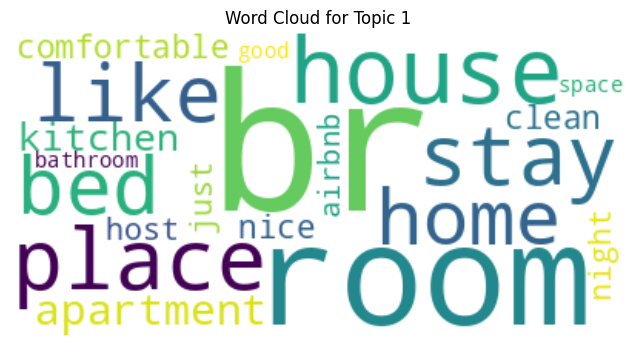

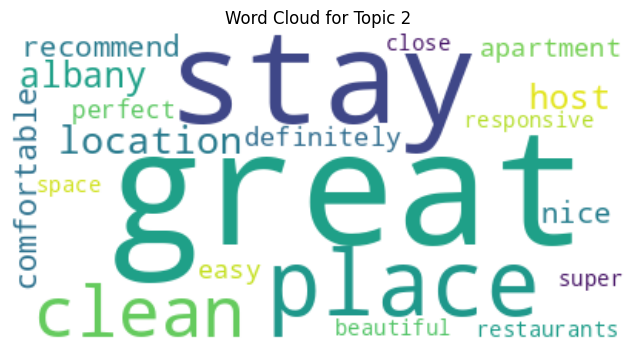

In [91]:
# @title 2. Create word clouds for each topic
# Create word clouds for each topic
for topic_idx, topic in enumerate(best_model.components_):
    word_freq = {feature_names[i]: topic[i] for i in topic.argsort()[-20:]}
    wordcloud = WordCloud(background_color='white').generate_from_frequencies(word_freq)
    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for Topic {topic_idx + 1}")
    plt.show()




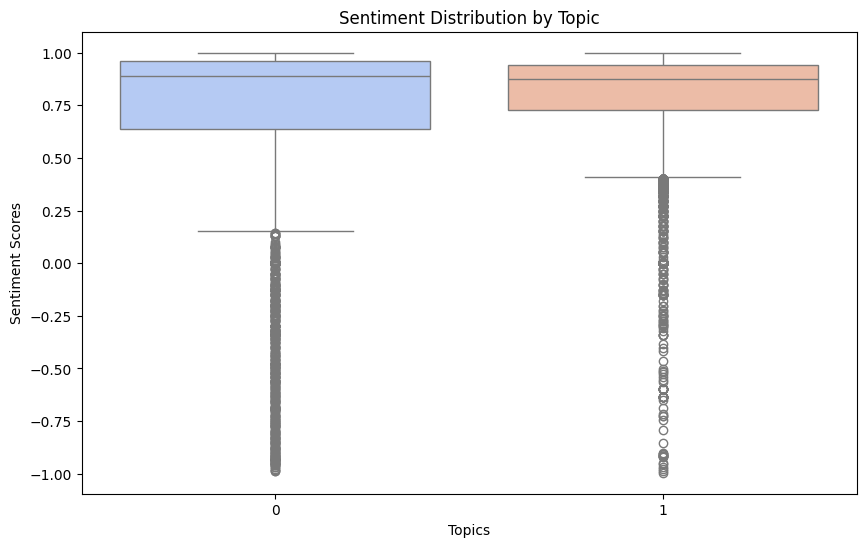

In [114]:
# @title Sentiment Distribution by Topic

# import seaborn as sns

# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='topic',  hue='topic', y='sentiment', palette='coolwarm', legend=False)
plt.title('Sentiment Distribution by Topic')
plt.xlabel('Topics')
plt.ylabel('Sentiment Scores')
plt.show()

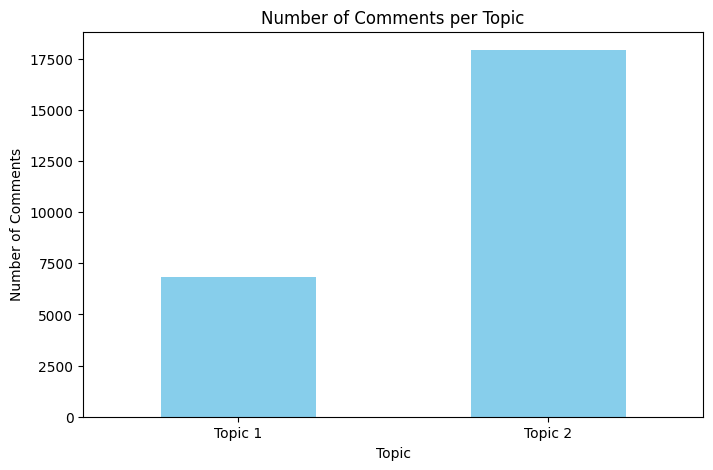

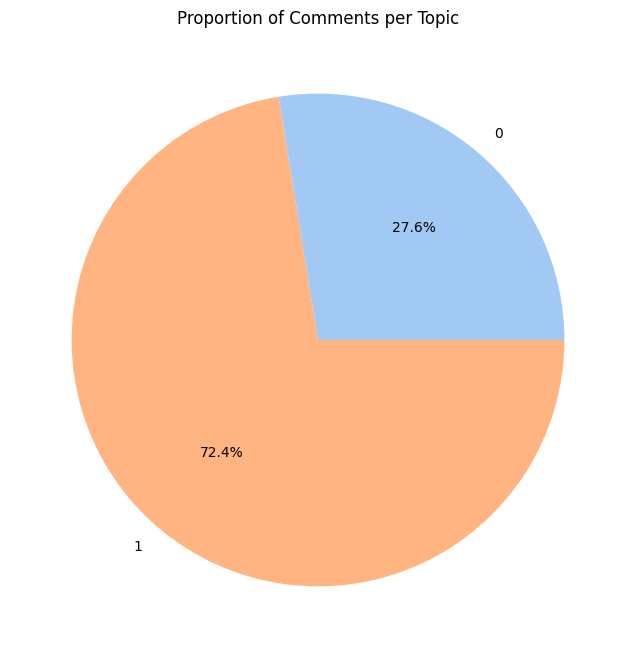

In [115]:
# @title Topic Assignment Distribution

# Count the number of comments per topic
topic_counts = data['topic'].value_counts().sort_index()

# Bar chart
plt.figure(figsize=(8, 5))
topic_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Comments per Topic')
plt.xlabel('Topic')
plt.ylabel('Number of Comments')
plt.xticks(range(len(topic_counts)), [f'Topic {i+1}' for i in range(len(topic_counts))], rotation=0)
plt.show()

# Alternatively, a pie chart
plt.figure(figsize=(8, 8))
topic_counts.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Proportion of Comments per Topic')
plt.ylabel('')  # Hide the y-label for better aesthetics
plt.show()

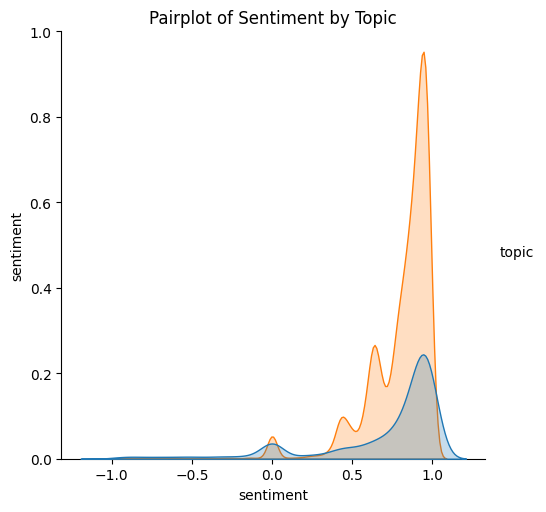

In [116]:
# @title Pairplot of Sentiment and Topics

sns.pairplot(data, vars=['sentiment'], hue='topic', palette='tab10', height=5)
plt.title('Pairplot of Sentiment by Topic')
plt.show()


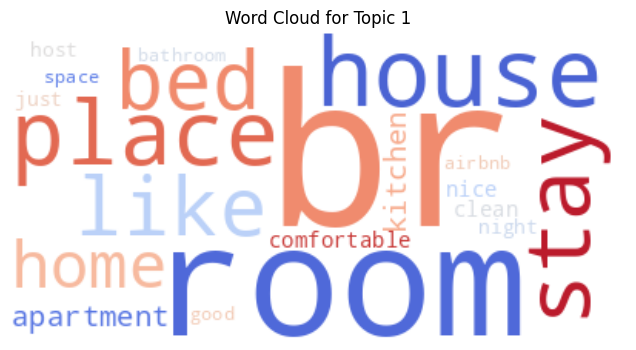

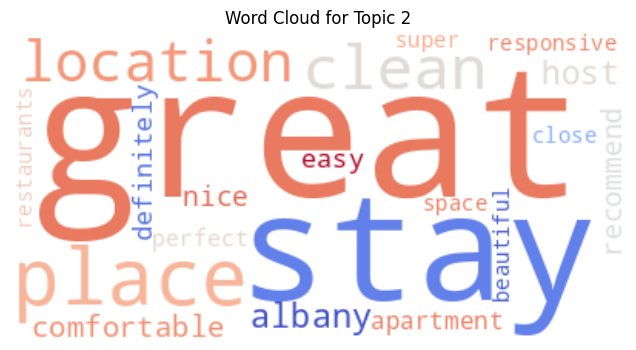

In [117]:
# @title Enhanced Word Cloud with Sentiment Weighting

for topic_idx, topic in enumerate(best_model.components_):
    word_freq = {feature_names[i]: topic[i] for i in topic.argsort()[-20:]}

    # Generate word cloud
    wordcloud = WordCloud(
        background_color='white',
        colormap='coolwarm',  # Colormap indicating sentiment
        contour_color='black'
    ).generate_from_frequencies(word_freq)

    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for Topic {topic_idx + 1}")
    plt.show()

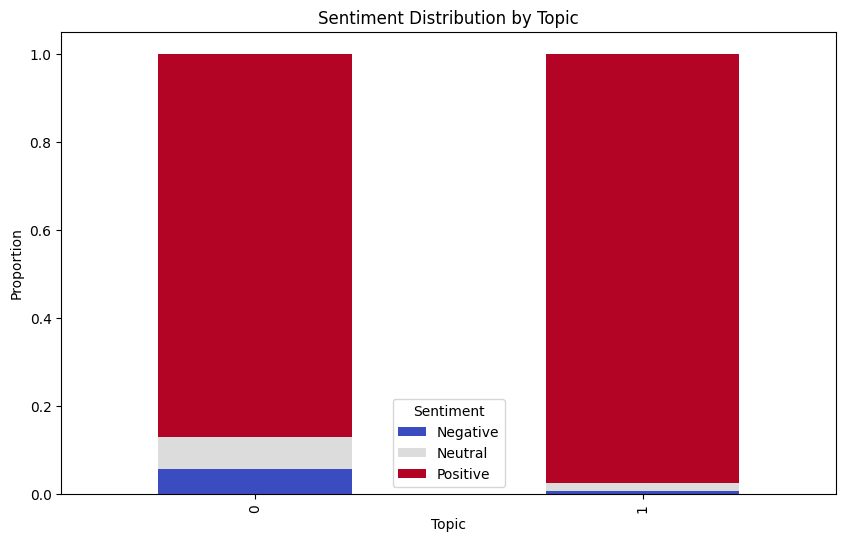

In [118]:
# @title Sentiment Distribution by Topic


# Assign each document its most relevant topic
topic_assignments = best_model.transform(doc_term_matrix).argmax(axis=1)
data['topic'] = topic_assignments

# Plot sentiment by topic
sentiment_by_topic = data.groupby('topic')['sentiment_label'].value_counts(normalize=True).unstack()
sentiment_by_topic.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm')
plt.title("Sentiment Distribution by Topic")
plt.ylabel("Proportion")
plt.xlabel("Topic")
plt.legend(title="Sentiment")
plt.show()

In [120]:
# @title Interactive Visualization with pyLDAvis

pyLDAvis.enable_notebook()
lda_vis = pyLDAvis.lda_model.prepare(best_model, doc_term_matrix, vectorizer)
pyLDAvis.display(lda_vis)

### Hyperparameter Tuning - Manual - GridSearchCV of scikit-learn - Optuna

In [98]:
# @title Hyperparameter Tuning - Manual

# Hyperparameter Tuning - Manual
# best_coherence = -np.inf
# best_num_topics = 0

# for num_topics in range(2, 10):  # Test topics from 2 to 9
#     lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
#     lda_model.fit(doc_term_matrix)
#     coherence = coherence_score(lda_model, feature_names, doc_term_matrix.toarray())
#     if coherence > best_coherence:
#         best_coherence = coherence
#         best_num_topics = num_topics

# print(f"Best Number of Topics: {best_num_topics}, Best Coherence Score: {best_coherence:.4f}")

#### Hyperparameter tuning using GridSearchCV of scikit-learn

In [99]:
# @title Hyperparameter tuning using GridSearchCV of scikit-learn
# # Perform Hyperparameter Tuning

# from sklearn.model_selection import GridSearchCV
# from sklearn.decomposition import LatentDirichletAllocation

# #n_components (Number of Topics)
#   #Description: Specifies the number of topics the LDA model should extract.
# 	#	Effect:
# 	  #	A smaller number of topics can generalize the content but may miss specific details.
# 	  #	A larger number of topics may overfit and generate less coherent topics.
# 	#	Values to Test: [2, 3, 5, 10]
# 	#	These values are commonly used to find a balance between generality and specificity based on the dataset’s nature.

# #learning_decay
# 	#	Description: Controls the rate at which the model learns during the online learning process.
# 	#	Effect:
# 	  #	A lower value (closer to 0.5) results in slower learning and may capture fine-grained patterns.
# 	  #	A higher value (closer to 1.0) results in faster convergence but may overlook some patterns.
# 	#	Values to Test: [0.5, 0.7, 0.9]
# 	#	These are standard values to balance convergence speed and model robustness.

# #learning_offset
# 	#	Description: A constant that down-weights the influence of early iterations in the online learning process.
# 	#	Effect:
# 	  #	Larger values can reduce bias from early iterations and stabilize learning.
# 	  #	Smaller values may lead to faster convergence but could introduce instability.
# 	#	Values to Test: [10, 50, 100]
# 	#	These values ensure a wide range of exploration for optimal results.

# # random_state
# 	#	Description: Sets the seed for random number generation to ensure reproducibility.
# 	#	Effect:
# 	  #	Using the same random_state ensures that the results are consistent across runs.
# 	#	Values to Test: [42] (fixed)
# 	#	Typically, this is not tuned but set to a constant value for reproducibility.

# # Key Relationships Between Parameters

# # 	* n_components vs. learning_decay: A model with more topics (n_components) may require a higher learning_decay to converge effectively.
# # 	* learning_offset and Stability: Larger learning_offset values are beneficial for datasets with high variability, as they reduce the influence of earlier iterations.

# # Define parameter grid
# param_grid = {
#     'n_components': [2, 3, 5, 10],  # Number of topics to try
#     'learning_decay': [0.5, 0.7, 0.9],  # Learning decay values
#     'learning_offset': [10, 50, 100],  # Offset values
#     'random_state': [42]  # Ensure reproducibility
# }

# # Initialize LDA model
# lda_model = LatentDirichletAllocation(max_iter=10, random_state=42)

# # Perform grid search
# grid_search = GridSearchCV(lda_model, param_grid, cv=3, verbose=1, n_jobs=-1)
# grid_search.fit(doc_term_matrix)

# # Print best parameters and score
# print("Best Parameters:", grid_search.best_params_)
# print("Best Log-Likelihood Score:", grid_search.best_score_)

In [100]:
# # @title Evaluating the Results

# # Refit LDA with the best parameters
# best_lda_model = grid_search.best_estimator_

# # Display topics with the best model
# display_topics(best_lda_model, vectorizer.get_feature_names_out(), num_words=10)

# # Transform the document-term matrix to assign topics
# topic_assignments = best_lda_model.transform(doc_term_matrix)
# data['topic'] = topic_assignments.argmax(axis=1)


In [101]:
# # @title Visualizing Hyperparameter Tuning Results
# # Get GridSearchCV results into a DataFrame
# results = pd.DataFrame(grid_search.cv_results_)

# # Plot log-likelihood scores for different values of `n_components`
# import matplotlib.pyplot as plt

# plt.figure(figsize=(10, 6))
# for decay in param_grid['learning_decay']:
#     subset = results[results['param_learning_decay'] == decay]
#     plt.plot(subset['param_n_components'], subset['mean_test_score'], label=f"Decay={decay}")

# plt.title("Hyperparameter Tuning for LDA")
# plt.xlabel("Number of Topics")
# plt.ylabel("Log-Likelihood Score")
# plt.legend()
# plt.show()

In [102]:
# @title Hyperparameter Tuning - Using Optuna

# Since the environment was crashing I had to change the following parameters.
# n_topics = trial.suggest_int("n_topics", 2, 10) <-- change from 20 to 10
# alpha = trial.suggest_float("doc_topic_prior", 0.03, 1.0) <-- Change from 0.01 to 0.03
# beta = trial.suggest_float("topic_word_prior", 0.03, 1.0) <-- Change from 0.01 to 0.03

# def compute_coherence(lda_model, doc_term_matrix, feature_names, top_n=10):
#     topics = lda_model.components_
#     coherence_scores = []
#     for topic in topics:
#         top_words = [feature_names[i] for i in topic.argsort()[-top_n:]]
#         word_pairs = [(top_words[i], top_words[j]) for i in range(len(top_words)) for j in range(i + 1, len(top_words))]
#         coherence = np.mean([cosine_similarity(doc_term_matrix[:, [feature_names.tolist().index(w1)]].toarray(),
#                                                doc_term_matrix[:, [feature_names.tolist().index(w2)]].toarray())[0][0]
#                              for w1, w2 in word_pairs])
#         coherence_scores.append(coherence)
#     return np.mean(coherence_scores)

# def objective(trial):
#     n_topics = trial.suggest_int("n_topics", 2, 10)
#     alpha = trial.suggest_float("doc_topic_prior", 0.03, 1.0)
#     beta = trial.suggest_float("topic_word_prior", 0.03, 1.0)

#     lda_model = LatentDirichletAllocation(
#         n_components=n_topics,
#         doc_topic_prior=alpha,
#         topic_word_prior=beta,
#         random_state=42,
#         max_iter=10
#     )
#     lda_model.fit(doc_term_matrix)
#     return compute_coherence(lda_model, doc_term_matrix, feature_names)

# study = optuna.create_study(direction="maximize")
# study.optimize(objective, n_trials=20)

# print("Best Parameters:", study.best_params)



### Unit Tests for the functions

In [103]:
# @title Unit tests for the functions

import pytest

# pylint: disable=missing-module-docstring
# pylint: disable=missing-class-docstring
# pylint: disable=missing-function-docstring

# Sample Data for the test

# Sample data for testing
sample_comments = [
    "This is a great product. I love it!",
    "The product is okay, but could be improved.",
    "Terrible experience. I hate it.",
    "Amazing quality and excellent customer service.",
]

sample_preprocessed = [
    "great product love",
    "product okay improved",
    "terrible experience hate",
    "amazing quality excellent customer service",
]

sample_sentiments = [0.8, 0.1, -0.9, 0.85]

In [104]:
# @title Test Preprocessed texts
def test_preprocess_texts():
    # Test the text preprocessing function
    result = preprocess_texts('"This is a great product. I love it!", "The product is okay, but could be improved.", "Terrible experience. I hate it.", "Amazing quality and excellent customer service."')
    assert isinstance(result, list)
    assert len(result) == len('"This is a great product. I love it!", "The product is okay, but could be improved.", "Terrible experience. I hate it.", "Amazing quality and excellent customer service."')

In [105]:
# @title Test the stop words removal function
def test_remove_stop_words():
    # Test the stop words removal function
    text = "This is an example of a test."
    result = remove_stop_words(text)
    assert isinstance(result, str)
    assert "is" not in result  # Assuming "is" is a stop word

In [106]:
# @title Test tokenization
# def test_tokenize_comment():
#     # Test tokenization
#     text = "This is a test."
#     result = tokenize_comment(text)
#     assert isinstance(result, list)
#     assert "This" in result

In [107]:
# @title Test topic display (mocking the LDA model)
def test_display_topics():
    # Test topic display (mocking the LDA model)
    feature_names = ["word1", "word2", "word3"]
    model = LatentDirichletAllocation(n_components=2, random_state=42)
    mock_matrix = np.array([[0.2, 0.3, 0.5], [0.4, 0.4, 0.2]])
    model.components_ = mock_matrix
    result = display_topics(model, feature_names)
    assert isinstance(result, list)

In [108]:
# @title Test sentiment analysis function
def test_analyze_sentiment():
    # Test sentiment analysis function
    text = "I love this product."
    sentiment = analyze_sentiment(text)
    assert isinstance(sentiment, float)
    assert -1.0 <= sentiment <= 1.0

In [109]:
# @title Test coherence calculation
def test_calculate_coherence():
    # Test coherence calculation
    feature_names = ["word1", "word2", "word3"]
    model = LatentDirichletAllocation(n_components=2, random_state=42)
    mock_matrix = np.array([[0.2, 0.3, 0.5], [0.4, 0.4, 0.2]])
    model.components_ = mock_matrix
    result = calculate_coherence(model, mock_matrix)
    assert isinstance(result, float)

In [110]:
# @title Test coherence computation with mock data
def test_compute_coherence():
    # Test coherence computation with mock data
    feature_names = ["word1", "word2", "word3"]
    lda_model = LatentDirichletAllocation(n_components=2, random_state=42)
    mock_matrix = np.array([[0.2, 0.3, 0.5], [0.4, 0.4, 0.2]])
    lda_model.components_ = mock_matrix
    result = compute_coherence(lda_model, mock_matrix, feature_names)
    assert isinstance(result, list)
    assert len(result) > 0

In [111]:
test_remove_stop_words
test_display_topics

<function __main__.test_display_topics()>